## Exploratory Analysis
## To begin this exploratory analysis, first use pip install pymyssql,sqLAlchemy; matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

In [193]:
 pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [194]:
pip install SQLAlchemy


Note: you may need to restart the kernel to use updated packages.


In [195]:
from sqlalchemy import create_engine
import pandas as pd

# Replace with your actual database credentials
user = 'root'
password = 'Chubas#29912'
host = '127.0.0.1'
port = '3306'
database = 'world_happiness'

# Create an engine instance
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# Connect to the database
connection = engine.connect()


In [196]:
# Define the SQL query

join_query = """  
SELECT id,name,economy,family,freedom,health,corruption
    FROM happiness_indicators hi
JOIN countries ON countries.id= hi.country_id
;"""


In [197]:
Join_df = pd.read_sql(join_query, con=engine)

In [198]:
Join_df

,id,name,economy,family,freedom,health,corruption
0,1,Norway,1.616,1.534,0.635,0.797,0.316
1,2,Denmark,1.482,1.551,0.626,0.793,0.401
2,3,Iceland,1.481,1.611,0.627,0.834,0.154
3,4,Switzerland,1.565,1.517,0.620,0.858,0.367
4,5,Finland,1.444,1.540,0.618,0.809,0.383
...,...,...,...,...,...,...,...
150,151,Rwanda,0.369,0.946,0.582,0.326,0.455
151,152,Syria,0.777,0.396,0.082,0.501,0.151
152,153,Tanzania,0.511,1.042,0.390,0.365,0.066
153,154,Burundi,0.092,0.630,0.060,0.152,0.084


In [199]:
Join_df

Join_df = Join_df.rename(columns={'id': 'country_id', 'name': 'country_name'})



In [200]:
Join_df

,country_id,country_name,economy,family,freedom,health,corruption
0,1,Norway,1.616,1.534,0.635,0.797,0.316
1,2,Denmark,1.482,1.551,0.626,0.793,0.401
2,3,Iceland,1.481,1.611,0.627,0.834,0.154
3,4,Switzerland,1.565,1.517,0.620,0.858,0.367
4,5,Finland,1.444,1.540,0.618,0.809,0.383
...,...,...,...,...,...,...,...
150,151,Rwanda,0.369,0.946,0.582,0.326,0.455
151,152,Syria,0.777,0.396,0.082,0.501,0.151
152,153,Tanzania,0.511,1.042,0.390,0.365,0.066
153,154,Burundi,0.092,0.630,0.060,0.152,0.084


In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

 ## Visualizations

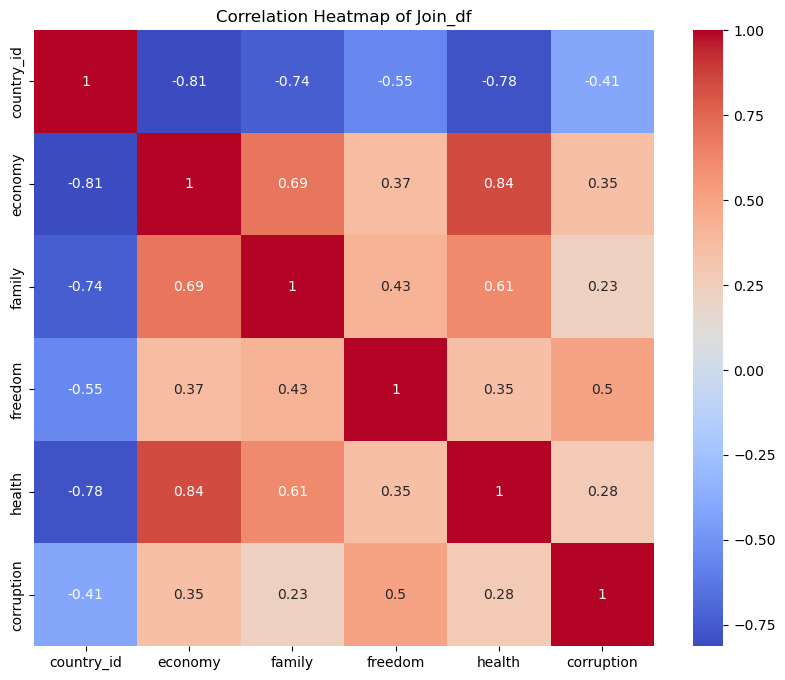

In [202]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Join_df .corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Join_df')
plt.show()

In [203]:
average_scores = Join_df.mean()
average_scores = average_scores.drop('country_id')

C:\Users\User\AppData\Local\Temp\ipykernel_16516\129692586.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_scores = Join_df.mean()


In [204]:
print(average_scores)

economy       0.984716
family        1.188871
freedom       0.408761
health        0.551342
corruption    0.123097
dtype: float64


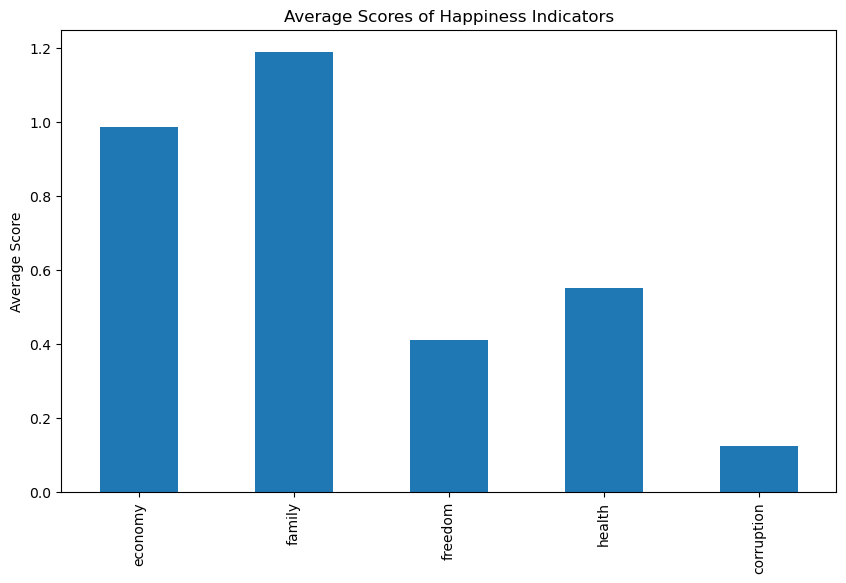

In [205]:
plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar')
plt.title('Average Scores of Happiness Indicators')
plt.ylabel('Average Score')
plt.show()

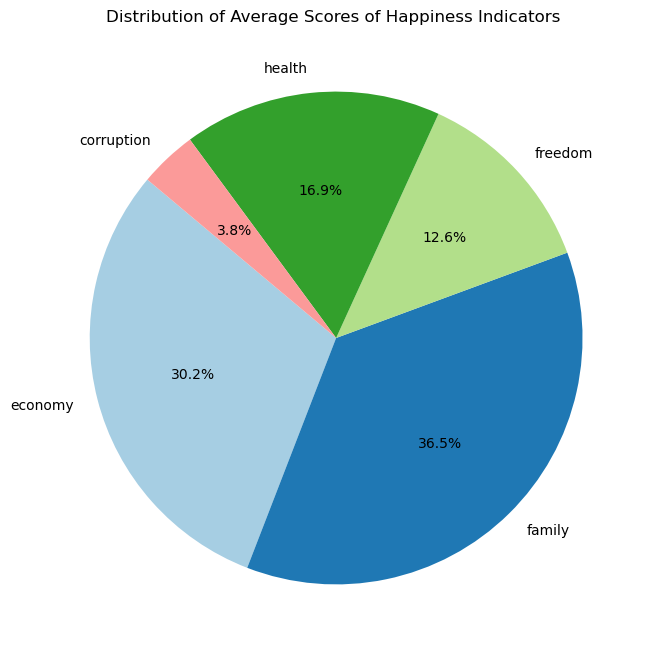

In [206]:
 # Plot pie chart for average scores
plt.figure(figsize=(10, 8))
plt.pie(average_scores, labels=average_scores.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Average Scores of Happiness Indicators ')
plt.show()

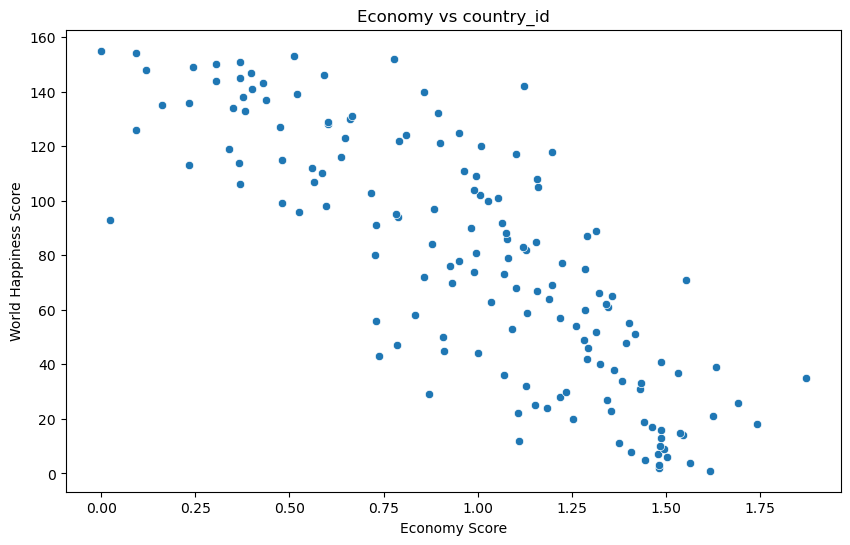

In [207]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='economy', y='country_id', data=Join_df)
plt.title('Economy vs country_id')
plt.xlabel('Economy Score')
plt.ylabel('World Happiness Score')
plt.show()

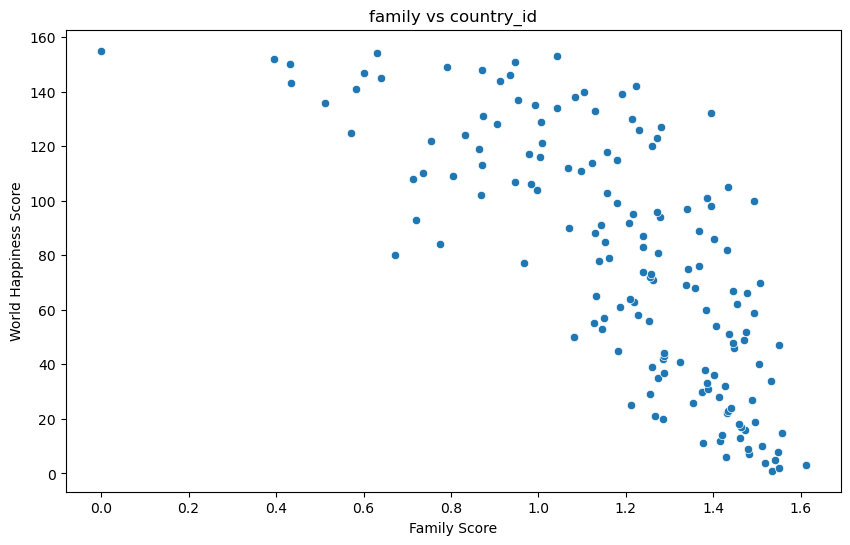

In [208]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='family', y='country_id', data=Join_df)
plt.title('family vs country_id')
plt.xlabel('Family Score')
plt.ylabel('World Happiness Score')
plt.show()

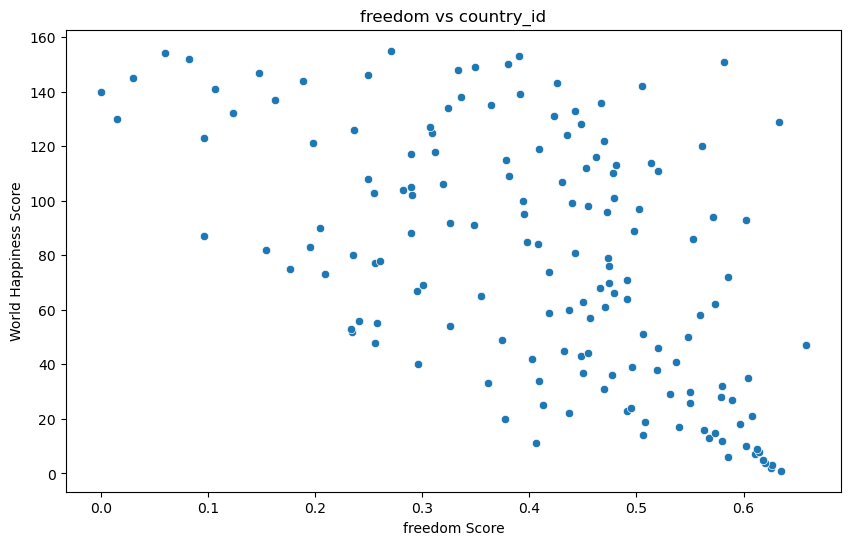

In [209]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='freedom', y='country_id', data=Join_df)
plt.title('freedom vs country_id')
plt.xlabel('freedom Score')
plt.ylabel('World Happiness Score')
plt.show()

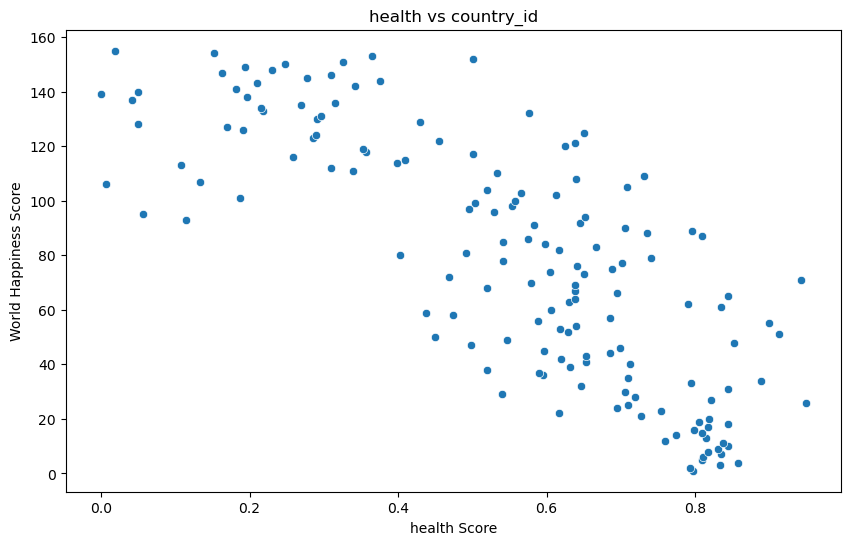

In [210]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='health', y='country_id', data=Join_df)
plt.title('health vs country_id')
plt.xlabel('health Score')
plt.ylabel('World Happiness Score')
plt.show()

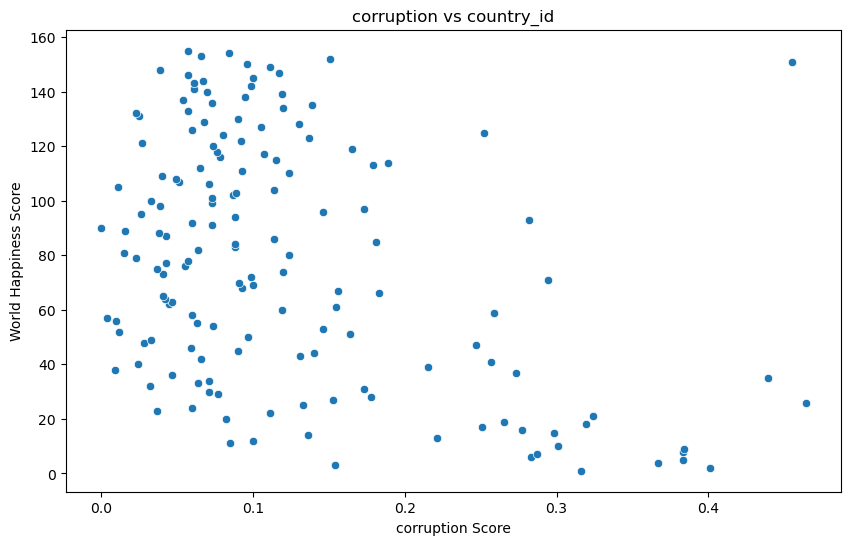

In [211]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='corruption', y='country_id', data=Join_df)
plt.title('corruption vs country_id')
plt.xlabel('corruption Score')
plt.ylabel('World Happiness Score')
plt.show()

In [ ]:
import plotly.express as px

join_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

 ## The countries with the highest and lowest world happiness scores

In [184]:


# Assuming Join_df is your merged DataFrame
# Example DataFrame (replace this with your actual DataFrame)
Join_df = pd.DataFrame({
    'country': ['CountryA', 'CountryB', 'CountryC'],
    'world_happiness': [7.5, 6.0, 8.0],
    'economy': [1.2, 1.0, 1.4],
    'family': [1.1, 0.9, 1.3],
    'freedom': [0.8, 0.7, 0.9],
    'health': [0.9, 0.8, 1.0],
    'corruption': [0.5, 0.6, 0.4]
})

# Find the country with the highest world happiness score
highest_happiness = Join_df.loc[Join_df['world_happiness'].idxmax()]

# Find the country with the lowest world happiness score
lowest_happiness = Join_df.loc[Join_df['world_happiness'].idxmin()]

print("Country with the highest world happiness score:")
print(highest_happiness)

print("\nCountry with the lowest world happiness score:")
print(lowest_happiness)


Country with the highest world happiness score:
country            CountryC
world_happiness         8.0
economy                 1.4
family                  1.3
freedom                 0.9
health                  1.0
corruption              0.4
Name: 2, dtype: object

Country with the lowest world happiness score:
country            CountryB
world_happiness         6.0
economy                 1.0
family                  0.9
freedom                 0.7
health                  0.8
corruption              0.6
Name: 1, dtype: object


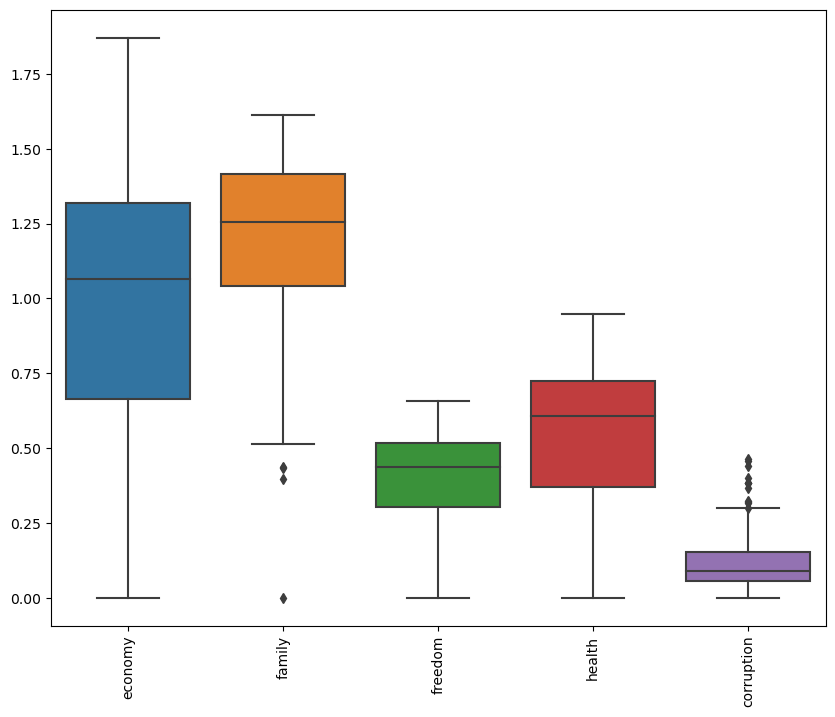

In [215]:
import seaborn as sns

# Plot box plots for each numerical column
plt.figure(figsize=(10, 8))
sns.boxplot(data=Join_df.drop(columns=['country_id']))
plt.xticks(rotation=90)
plt.show()
